# CDC NHANES 2013-2014 EDA

## Overview

The purpose of this notebook is to visually explore and become familiar with the patterns of the 2013-2014 NHANES datasets

In [93]:
#importing necessary packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf 
from sklearn.preprocessing import StandardScaler
import os

### Demographic EDA

In [96]:
# importing clean demographic data
demographic_df = pd.read_csv('~/Downloads/capstone/CapstoneJulyNYC/Data/Clean_Data/demographic_df_clean_filtered.csv')

In [98]:
demographic_df = demographic_df.set_index('SEQN')

In [100]:
demographic_df

,sex,age,fam_income_poverty_ratio,Education_College graduate or above,Education_Don't Know,Education_High school graduate/GED or equivalent,Education_Less than 9th grade,Education_Refused,Education_Some college or AA degree,Marital_Status_Married,Marital_Status_Never married,Marital_Status_Separated,Marital_Status_Widowed,Ethnicity_Mexican American,Ethnicity_Non-Hispanic Asian,Ethnicity_Non-Hispanic Black,Ethnicity_Non-Hispanic White,Ethnicity_Other Hispanic,Ethnicity_Other Race - Including Multi-Racial
SEQN,,,,,,,,,,,,,,,,,,,
73557,1,69,0.84,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0
73558,1,54,1.78,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0
73559,1,72,4.51,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0
73561,0,73,5.00,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
73562,1,56,4.79,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83723,1,61,3.53,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
83724,1,80,3.09,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0
83726,1,40,3.81,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0


### Distribution Analysis

#### Numerical Columns

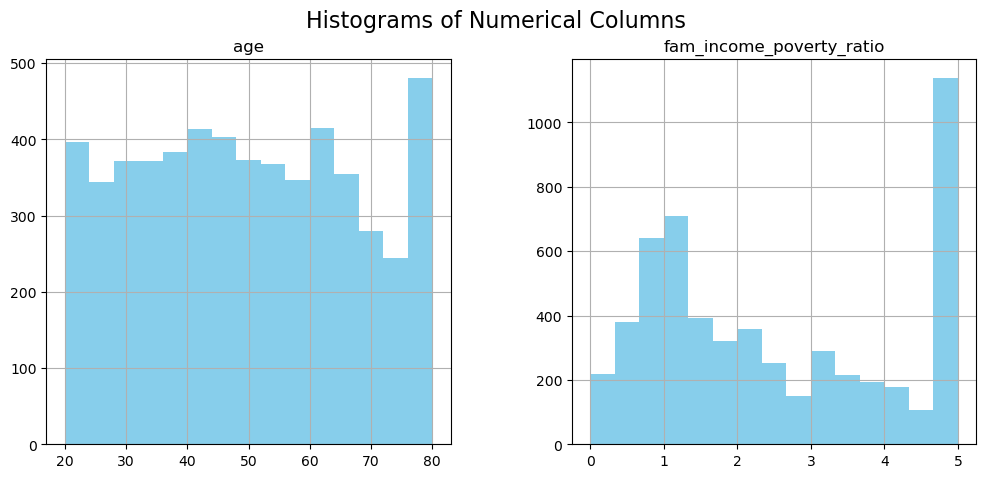

In [104]:
demographic_df[['age', 'fam_income_poverty_ratio']].hist(bins=15, figsize=(12, 5), color='skyblue')
plt.suptitle('Histograms of Numerical Columns', fontsize=16)
plt.show()

For ages, there is a larger amount of individuals 80+. NHANES categorizes respondents who are older than 80 as '80' year olds, which can explain why that amount has a large count.
The variable "fam_income_poverty_ratio" represents the ratio of family income to poverty. Values less than 1 indicate family income is below poverty level. Value of 1 equals family income is exactly the poverty level. Value greater than 1 means family income is above poverty level. The majority of respondents' income are above poverty level. 

#### Categorical Columns

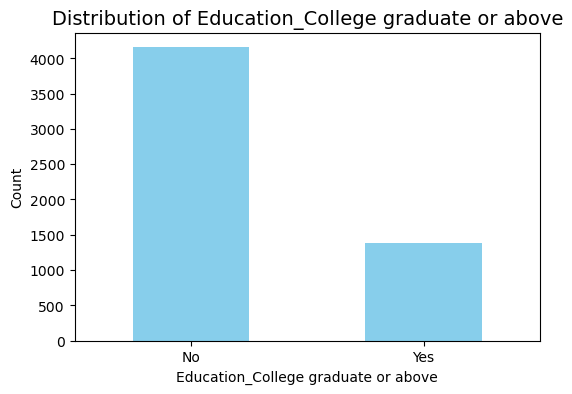

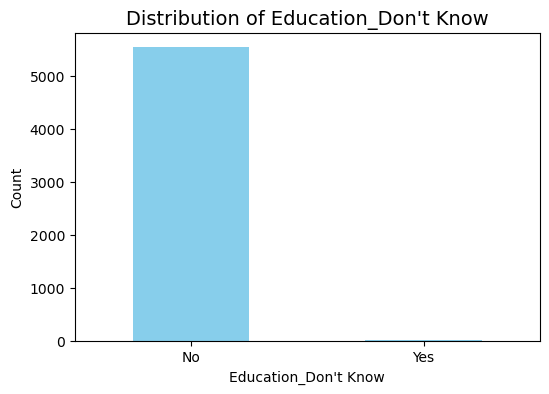

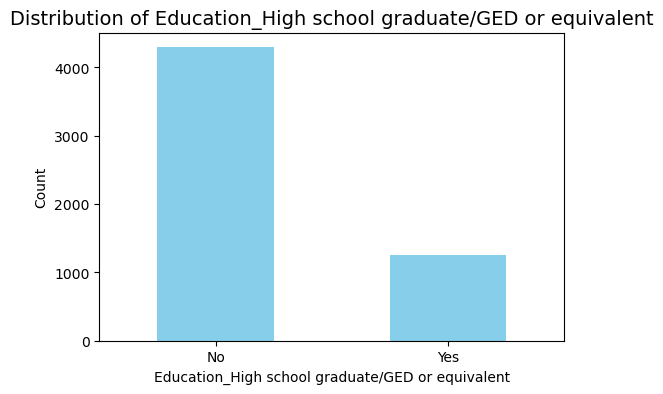

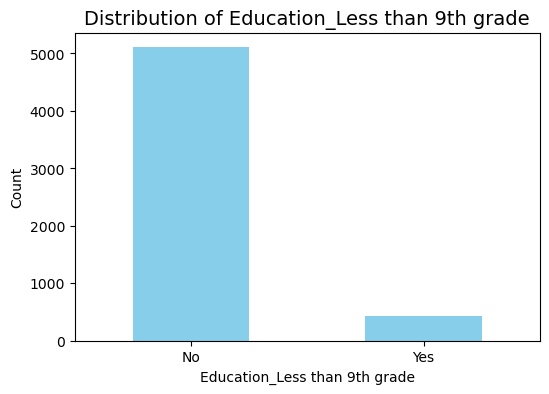

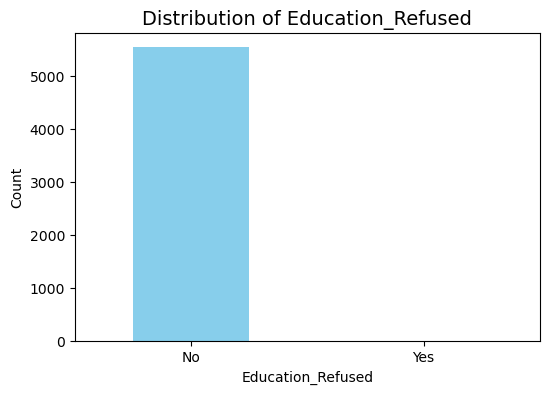

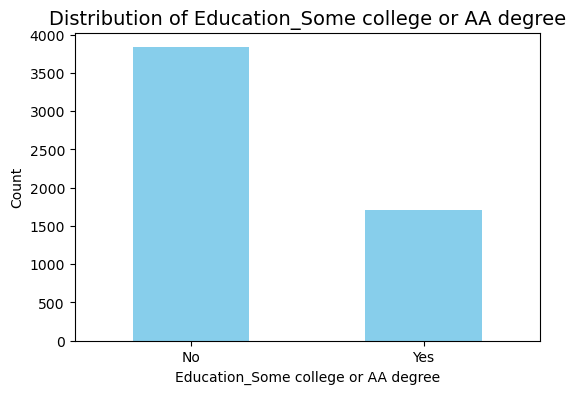

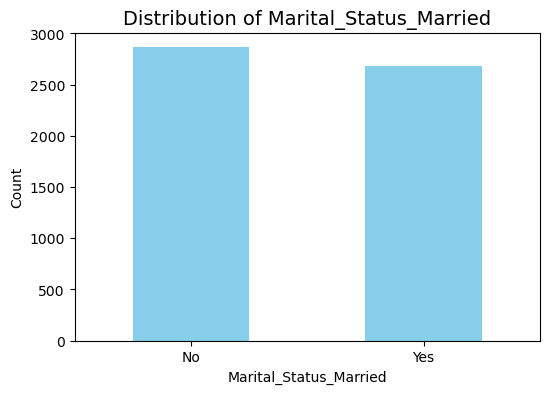

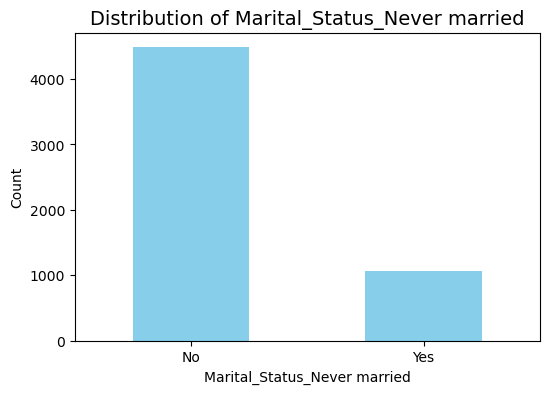

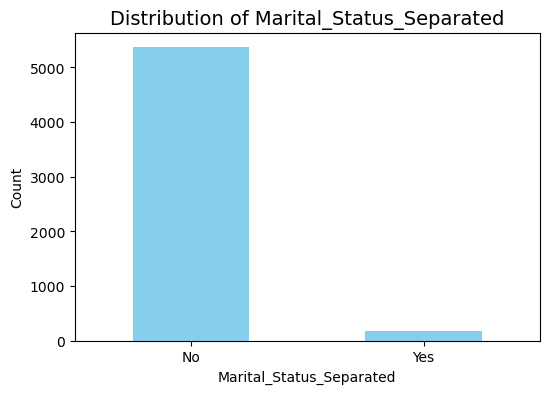

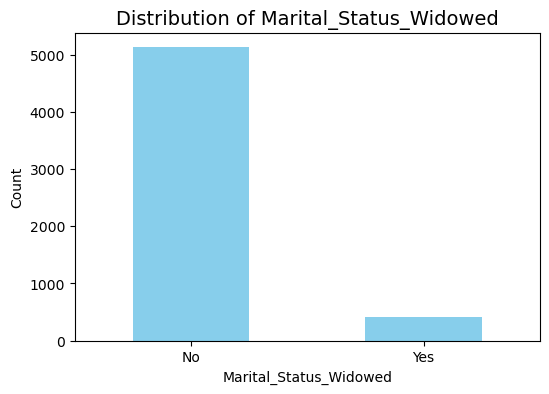

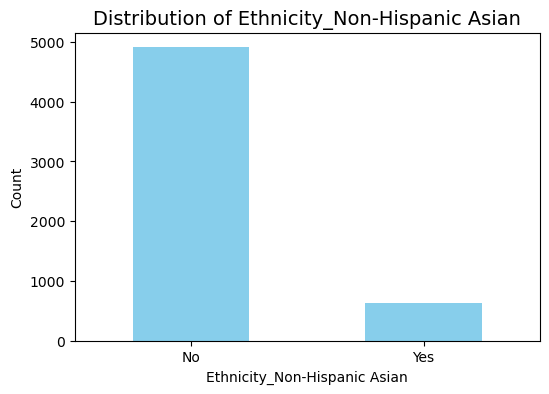

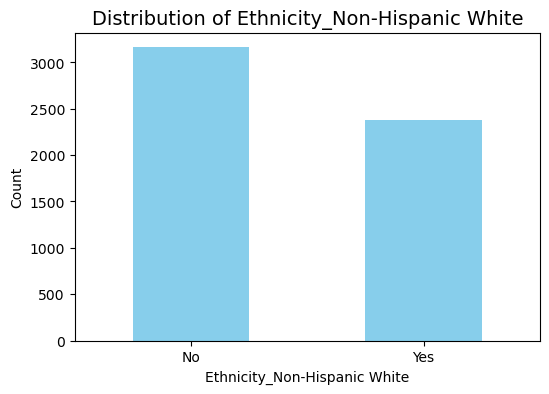

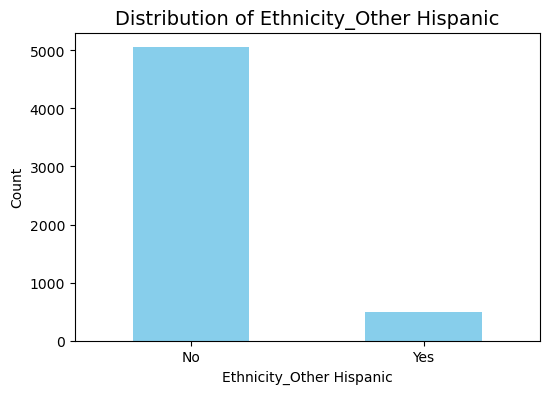

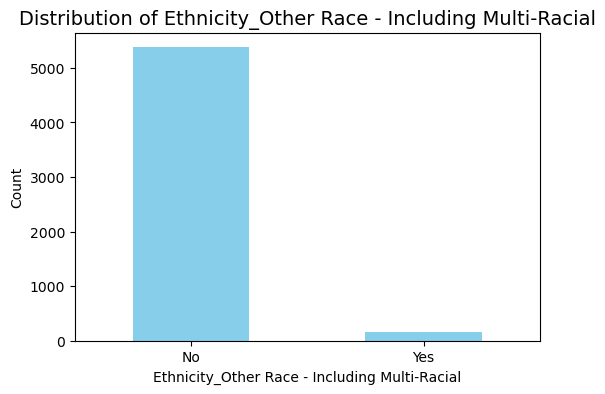

In [108]:
categorical_columns = ['Education_College graduate or above', 'Education_Don\'t Know',
                       'Education_High school graduate/GED or equivalent', 'Education_Less than 9th grade', 
                       'Education_Refused', 'Education_Some college or AA degree',
                       'Marital_Status_Married', 'Marital_Status_Never married', 'Marital_Status_Separated', 
                       'Marital_Status_Widowed', 'Ethnicity_Non-Hispanic Asian', 'Ethnicity_Non-Hispanic White', 
                       'Ethnicity_Other Hispanic', 'Ethnicity_Other Race - Including Multi-Racial']

# Create bar charts for each one-hot encoded column
for col in categorical_columns:
    demographic_df[col].value_counts().plot(kind='bar', color='skyblue', figsize=(6, 4))
    plt.title(f'Distribution of {col}', fontsize=14)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks([0, 1], labels=['No', 'Yes'], rotation=0)
    plt.show()

There is an almost equal distribution between those who fall in the "Non-Hispanic White" category vs those who don't. As well as an almost equal distribution of those who are married and those who are not. 

### Correlations

#### Numerical

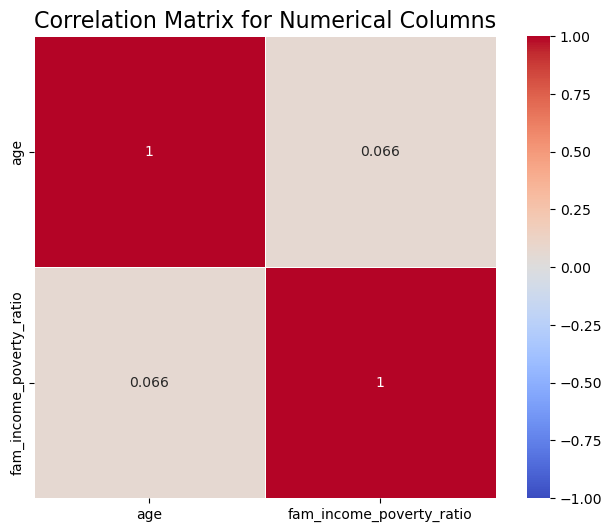

In [113]:
# 1. Calculate the correlation matrix for numerical columns
numerical_columns = ['age', 'fam_income_poverty_ratio']
correlation_matrix = demographic_df[numerical_columns].corr()

# 2. Plot the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5, square=True)
plt.title('Correlation Matrix for Numerical Columns', fontsize=16)
plt.show()

Based on the correlation matrix, age and fam_income_poverty_ratio have a weak correlation, and age does not seem to be a strong predictor of income relative to poverty.

#### Income vs Education

In [123]:
# Condensing education levels and marital status into single columns for easier plotting
demographic_df['education_level'] = demographic_df[['Education_College graduate or above', 'Education_High school graduate/GED or equivalent', 
                            'Education_Less than 9th grade', 'Education_Some college or AA degree']].idxmax(axis=1)

demographic_df['marital_status'] = demographic_df[['Marital_Status_Married', 'Marital_Status_Never married', 'Marital_Status_Separated', 
                           'Marital_Status_Widowed']].idxmax(axis=1)


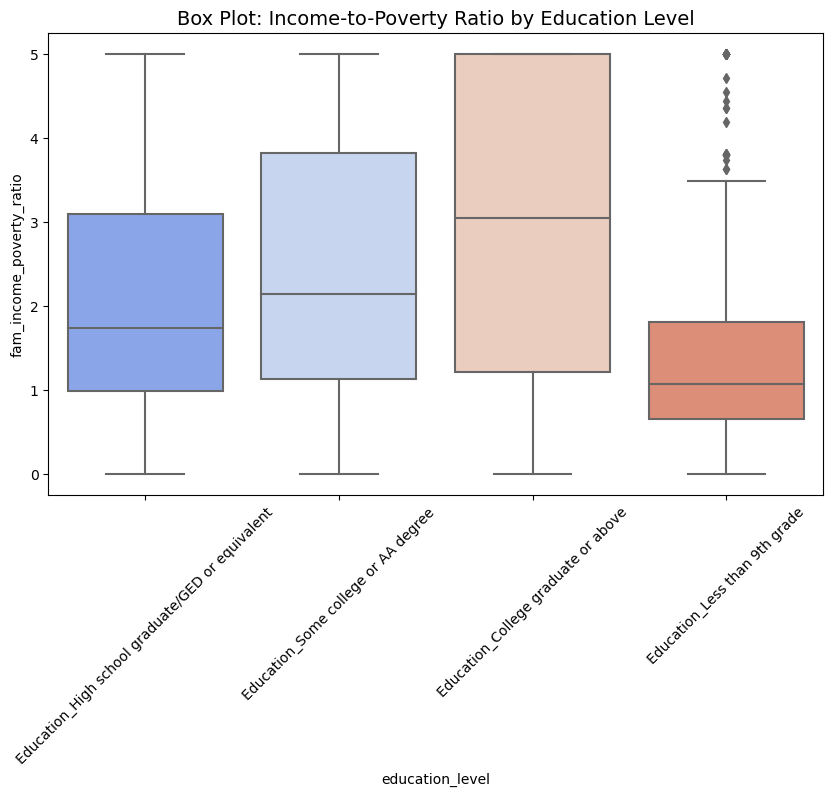

In [125]:
plt.figure(figsize=(10, 6))

# Box Plot
sns.boxplot(data=demographic_df, x='education_level', y='fam_income_poverty_ratio', palette='coolwarm')
plt.title('Box Plot: Income-to-Poverty Ratio by Education Level', fontsize=14)
plt.xticks(rotation=45)

plt.show()

Median respondents who are in the __College graduate or above__ category have an income that is significantly above the poverty line, indicating that they are not at risk or not considered to be living in poverty. Median respondents who have an education less than the 9th grade are either close enough to be below the poverty line, or have an income that is exactly at the poverty level. 

#### Marital Status vs. Age

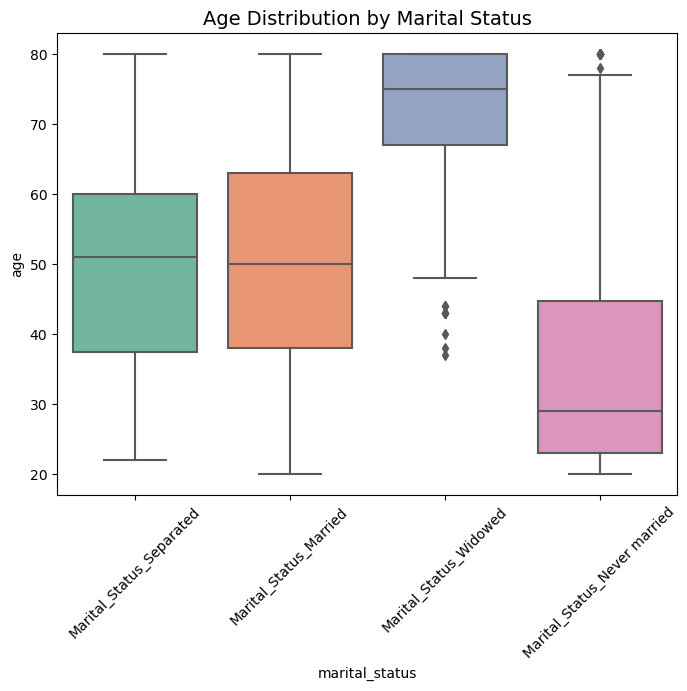

In [129]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=demographic_df, x='marital_status', y='age', palette='Set2')
plt.title('Age Distribution by Marital Status', fontsize=14)
plt.xticks(rotation=45)
plt.show()

Here are the takeaways of the distribution of __Marital Status By Age__:

The number of respondents in the _Never married_ category have a median age below 30. 

Those in the _Widowed_ category have a median age of about 75.

Respondents who belong in the _Married_ category has a median age of 50. 

Respondents in the _Seperated_ category have a median age of around 51.

#### Education vs Ethnicity 

In [133]:
# creating new column for ethnicity
def get_ethnicity(row):
    if row['Ethnicity_Mexican American'] == 1:
        return 'Mexican American'
    elif row['Ethnicity_Other Hispanic'] == 1:
        return 'Other Hispanic'
    elif row['Ethnicity_Non-Hispanic White'] == 1:
        return 'Non-Hispanic White'
    elif row['Ethnicity_Non-Hispanic Black'] == 1:
        return 'Non-Hispanic Black'
    elif row['Ethnicity_Non-Hispanic Asian'] == 1:
        return 'Non-Hispanic Asian'
    elif row['Ethnicity_Other Race - Including Multi-Racial'] == 1:
        return 'Other Race - Including Multi-Racial '
    else:
        return 'Unknown'

In [135]:
demographic_df['ethnicity'] = demographic_df.apply(get_ethnicity, axis=1)

In [137]:
# Step 2: Group by ethnicity and education level, then count
education_ethnicity_counts = demographic_df.groupby('ethnicity')[education_groups].sum()

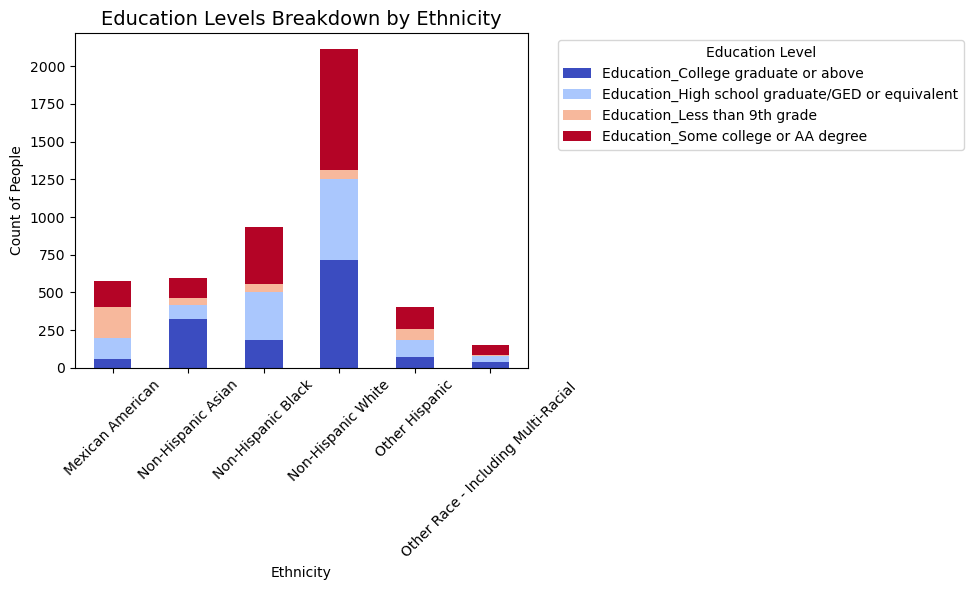

In [139]:
# Stacked bar chart for education levels within each ethnicity
education_ethnicity_counts.plot(kind='bar', stacked=True, figsize=(10, 6), cmap='coolwarm')
plt.title('Education Levels Breakdown by Ethnicity', fontsize=14)
plt.ylabel('Count of People')
plt.xticks(rotation=45)
plt.xlabel('Ethnicity')
plt.legend(title='Education Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Respondents with the highest amount of education belong to the _Non-Hispanic White_ category. This group has the highest amount of respondents that belong to the _College graduate or above_ category. Respondents in the _Mexican-American_ category have the highest number of respondents that have an education level of _Less than 9th grade_.

In [99]:
#Scaling Clean Demographic Data
# 1. Import the scaler
from sklearn.preprocessing import StandardScaler 

# 2. make a scaler
my_standard_scaler = StandardScaler() 

# 3. fit the scaler
my_standard_scaler.fit(demographic_df)

# 4. transform the data. Notice we get back a numpy array even if we put in a dataframe
scaled_demographic_df_data = my_standard_scaler.transform(demographic_df)

scaled_demographic_df = pd.DataFrame(columns=demographic_df.columns, data=scaled_demographic_df_data, index = demographic_df.index)
scaled_demographic_df.head()

,sex,age,fam_income_poverty_ratio,Education_College graduate or above,Education_Don't Know,Education_High school graduate/GED or equivalent,Education_Less than 9th grade,Education_Refused,Education_Some college or AA degree,Marital_Status_Married,Marital_Status_Never married,Marital_Status_Separated,Marital_Status_Widowed,Ethnicity_Non-Hispanic Asian,Ethnicity_Non-Hispanic White,Ethnicity_Other Hispanic,Ethnicity_Other Race - Including Multi-Racial
SEQN,,,,,,,,,,,,,,,,,
73557,1.046897,1.132027,-1.001922,-0.578044,-0.026866,1.855778,-0.292101,-0.013429,-0.666819,-1.036736,-0.484112,5.539985,-0.284396,1.968111,-0.867666,-0.311311,-0.409664
73558,1.046897,0.274932,-0.430270,-0.578044,-0.026866,1.855778,-0.292101,-0.013429,-0.666819,0.964565,-0.484112,-0.180506,-0.284396,-0.508101,1.152517,-0.311311,-0.409664
73559,1.046897,1.303446,1.229954,-0.578044,-0.026866,-0.538858,-0.292101,-0.013429,1.499658,0.964565,-0.484112,-0.180506,-0.284396,-0.508101,1.152517,-0.311311,-0.409664
73561,-0.955204,1.360586,1.527943,1.729971,-0.026866,-0.538858,-0.292101,-0.013429,-0.666819,0.964565,-0.484112,-0.180506,-0.284396,-0.508101,1.152517,-0.311311,-0.409664
73562,1.046897,0.389211,1.400234,-0.578044,-0.026866,-0.538858,-0.292101,-0.013429,1.499658,-1.036736,-0.484112,-0.180506,-0.284396,-0.508101,-0.867666,-0.311311,-0.409664


In [20]:
#scaled_demographic_df.to_csv('scaled_demographic_df.csv') #if you want to save a copy

### Questionnaire EDA

In [145]:
quest_df = pd.read_csv('~/Downloads/capstone/CapstoneJulyNYC/Data/Clean_Data/quest_df_clean_filtered.csv')

In [147]:
quest_df.head()

,SEQN,BP_Presence_Yes,high_col_Don't Know,high_col_No,high_col_Yes,Smoked_100_cigs_Don't Know,Smoked_100_cigs_No,Smoked_100_cigs_Yes,drink_greater_11_Don't Know,drink_greater_11_No,...,angina_Yes,heart_attack_Don't Know,heart_attack_No,heart_attack_Yes,stroke_Don't Know,stroke_No,stroke_Yes,close_relative_heart_attack_Don't Know,close_relative_heart_attack_No,close_relative_heart_attack_Yes
0,73557,1,0,0,1,0,0,1,0,0,...,0,0,1,0,0,0,1,0,1,0
1,73558,1,0,0,1,0,0,1,0,0,...,0,0,1,0,0,1,0,0,1,0
2,73559,1,0,0,1,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,1
3,73561,1,0,1,0,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,1
4,73562,1,0,0,1,0,0,1,0,0,...,0,0,0,1,0,1,0,0,1,0


### Health Condition Distribution

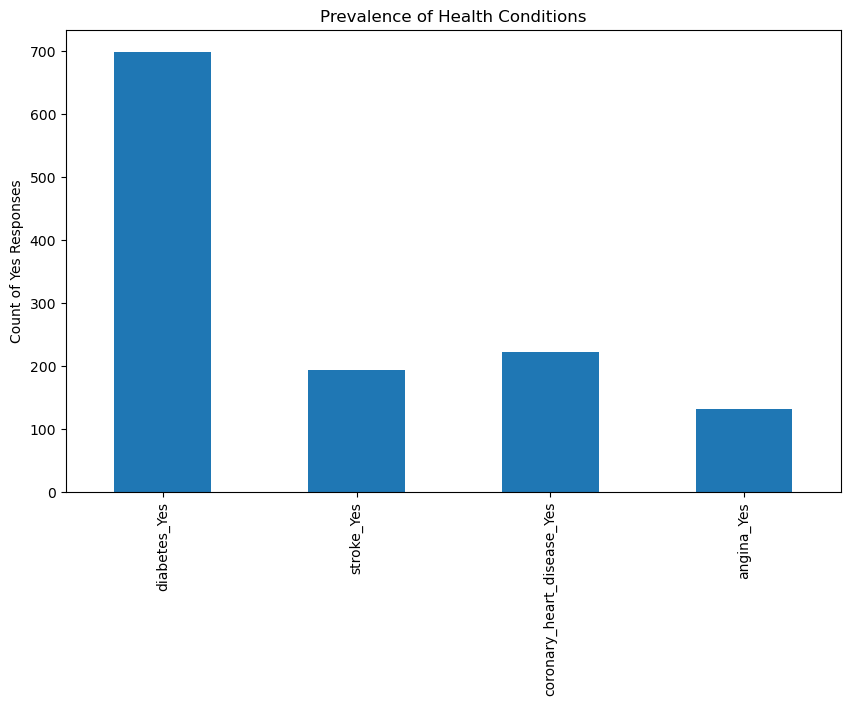

In [157]:
health_conditions = ['diabetes_Yes', 'stroke_Yes', 'coronary_heart_disease_Yes', 'angina_Yes']
quest_df[health_conditions].sum().plot(kind='bar', figsize=(10, 6))
plt.title('Prevalence of Health Conditions')
plt.ylabel('Count of Yes Responses')
plt.show()

A large amount of respondents are currently diabetic. Few respondents reported having a stroke or angina. While there were more respondent who reported being diagnosed with coronary heart disease. 

### Smoking & Health Conditions

In [188]:
# creating new column for smokestatus
def smoke_status(row):
    if row['Smoked_100_cigs_Yes'] == 1:
        return 'Smoker'
    elif row['Smoked_100_cigs_No'] == 1:
        return 'Non-Smoker'

In [190]:
quest_df['smoke_status'] = quest_df.apply(smoke_status, axis=1)

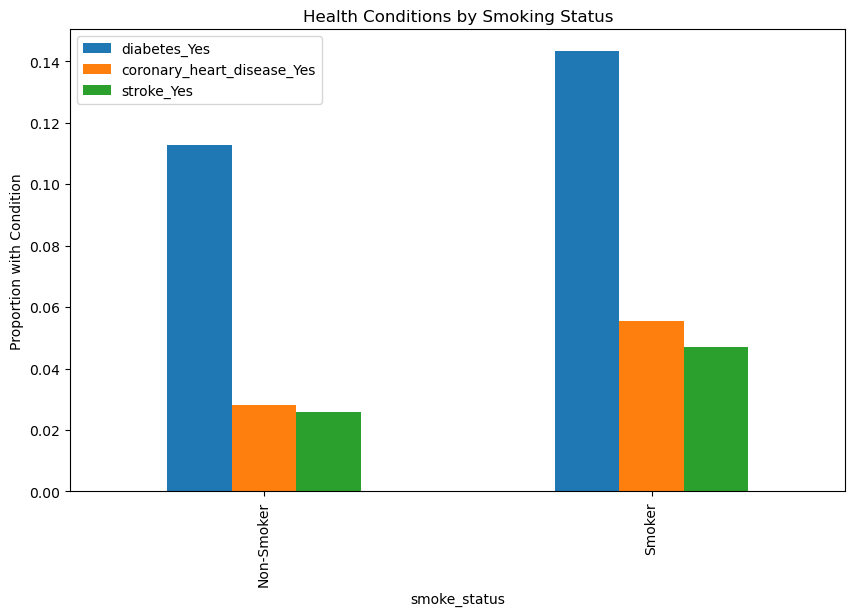

In [192]:
# Smoking vs health conditions
smoking_vs_health = quest_df.groupby('smoke_status')[['diabetes_Yes', 'coronary_heart_disease_Yes', 'stroke_Yes']].mean()
smoking_vs_health.plot(kind='bar', figsize=(10, 6))
plt.title('Health Conditions by Smoking Status')
plt.ylabel('Proportion with Condition')
plt.show()

A proportion of about 14% of smokers are diagnosed with diabetes compared to about 11% of non-smokers. About 6% of respondents who are smokers reported having coronary heart disease, compared to 3% of respondents who are non-smokers. 5% of respondents who smoke have reported having a stroke compared to about 3% of non-smoking respondents. 

### Mental Health and Chronic Conditions

In [203]:
# creating new column for mental status
def mental_status(row):
    if row['depressed_Nearly every day'] == 1:
        return 'Depressed Nearly Every Day'
    elif row['depressed_Nearly every day'] == 0:
        return 'Not Depressed Nearly Every Day'

In [205]:
quest_df['mental_status'] = quest_df.apply(mental_status, axis=1)

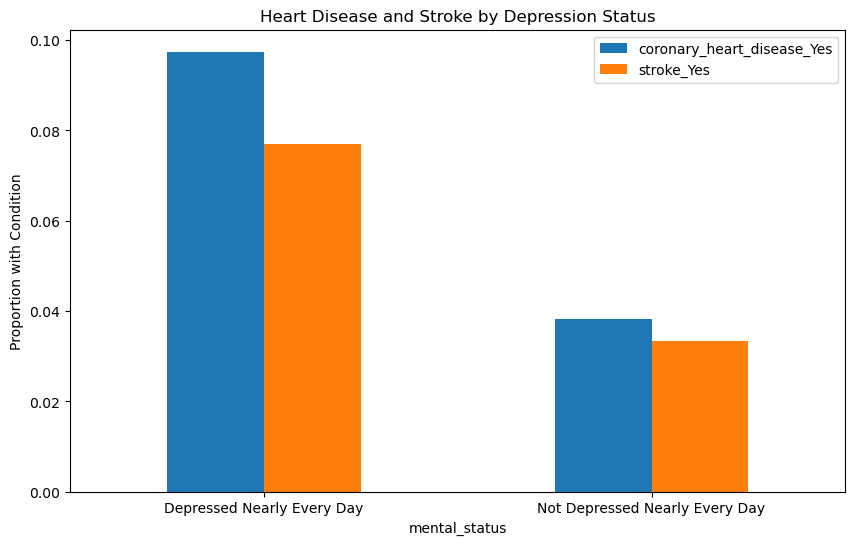

In [211]:
depression_vs_health = quest_df.groupby('mental_status')[['coronary_heart_disease_Yes', 'stroke_Yes']].mean()
depression_vs_health.plot(kind='bar', figsize=(10, 6))
plt.title('Heart Disease and Stroke by Depression Status')
plt.ylabel('Proportion with Condition')
plt.xticks(rotation=0)
plt.show()

9% of respondents who belong in the _Depressed Nearly Every Day_ category have coronary heart disease, while about 8% have reported having a stroke. About 4% of respondents in the _Not Depressed Nearly Every Day_ category have coronary heart disease. While about 3.8% reported having a stroke.

The proportion with having a stroke or being diagnosed with coronary heart disease more than doubles. 

### Heart Disease and Family History

In [219]:
# creating new column for family history 
def fam_history(row):
    if row['close_relative_heart_attack_Yes'] == 1:
        return 'Family History of Heart Attack'
    elif row['close_relative_heart_attack_No'] == 1:
        return 'No Family History of Heart Attack'

In [221]:
quest_df['fam_history'] = quest_df.apply(fam_history, axis=1)

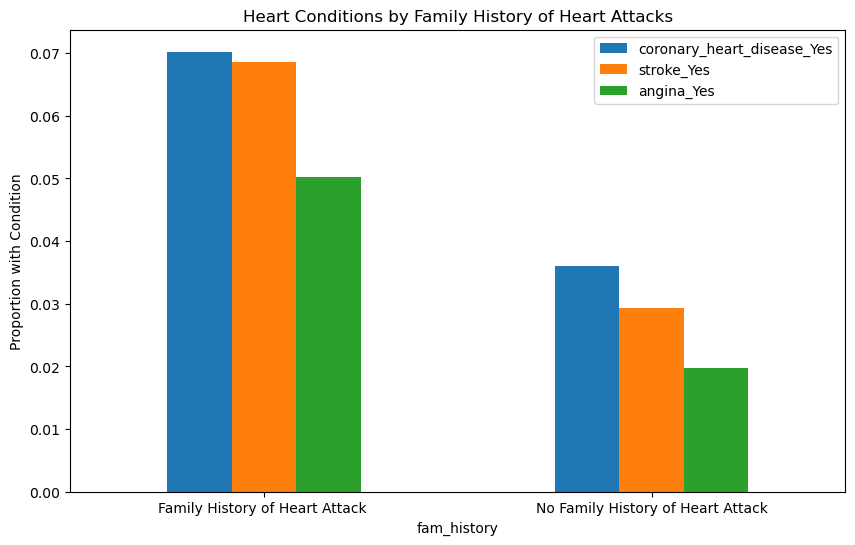

In [227]:
family_vs_heart_conditions = quest_df.groupby('fam_history')[['coronary_heart_disease_Yes', 'stroke_Yes', 'angina_Yes']].mean()
family_vs_heart_conditions.plot(kind='bar', figsize=(10, 6))
plt.title('Heart Conditions by Family History of Heart Attacks')
plt.ylabel('Proportion with Condition')
plt.xticks(rotation=0)
plt.show()

Respondents who have a family member younger than 50 who have suffered a heart attack are at an increased risk of developing cardiovascular disease. About 7% of respondents who reported having family history of a heart attack have also been diagnosed with coronary heart disease or a stroke, compared to those who have no family history of a Heart Attack and are diagnosed with coronary heart disease (about 4%), or have had a stroke (about 3%). Almost 5% of respondents who have family history also have experienced angina (chest pain symptoms), compared to 2% of respondents who have no family history. 

### Labs EDA

In [231]:
labs_df = pd.read_csv('~/Downloads/capstone/CapstoneJulyNYC/Data/Clean_Data/labs_df_clean_filtered.csv')

In [233]:
labs_df

,SEQN,total_calcium_lab,chol_lab,creatinine,sodium_lab,total_protein_lab,trigly_refridg,wbc_cnt,rbc_cnt,hemoglobin,hemoglobin_mean,hemoglobin_conc,platelet_cnt,HbA1c_percent,total_chol_lab
0,73557,9.5,168.0,1.21,136.0,6.5,140.0,4.7,5.09,15.2,29.9,33.4,204.0,13.9,167.0
1,73558,9.2,167.0,0.79,128.0,7.8,257.0,12.6,3.84,11.9,31.0,32.5,314.0,9.1,170.0
2,73559,8.9,127.0,1.22,142.0,5.9,51.0,7.2,5.53,17.2,31.1,34.3,237.0,8.9,126.0
3,73561,10.0,207.0,0.73,142.0,7.1,88.0,6.6,4.72,14.5,30.6,33.0,300.0,4.9,201.0
4,73562,9.3,230.0,0.89,143.0,7.3,327.0,9.4,4.93,14.2,28.8,34.2,249.0,5.5,226.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5541,83723,9.0,190.0,0.81,138.0,7.8,106.0,7.7,4.05,14.3,35.2,35.5,181.0,7.4,186.0
5542,83724,8.8,155.0,1.29,141.0,6.0,135.0,6.1,3.72,11.8,31.8,33.9,180.0,5.5,157.0
5543,83726,9.5,181.0,0.82,140.0,7.1,111.0,7.1,4.64,13.6,29.7,33.8,244.0,5.4,175.0
5544,83727,10.0,195.0,1.10,143.0,7.5,76.0,5.1,5.07,14.9,29.3,32.9,226.0,5.0,190.0


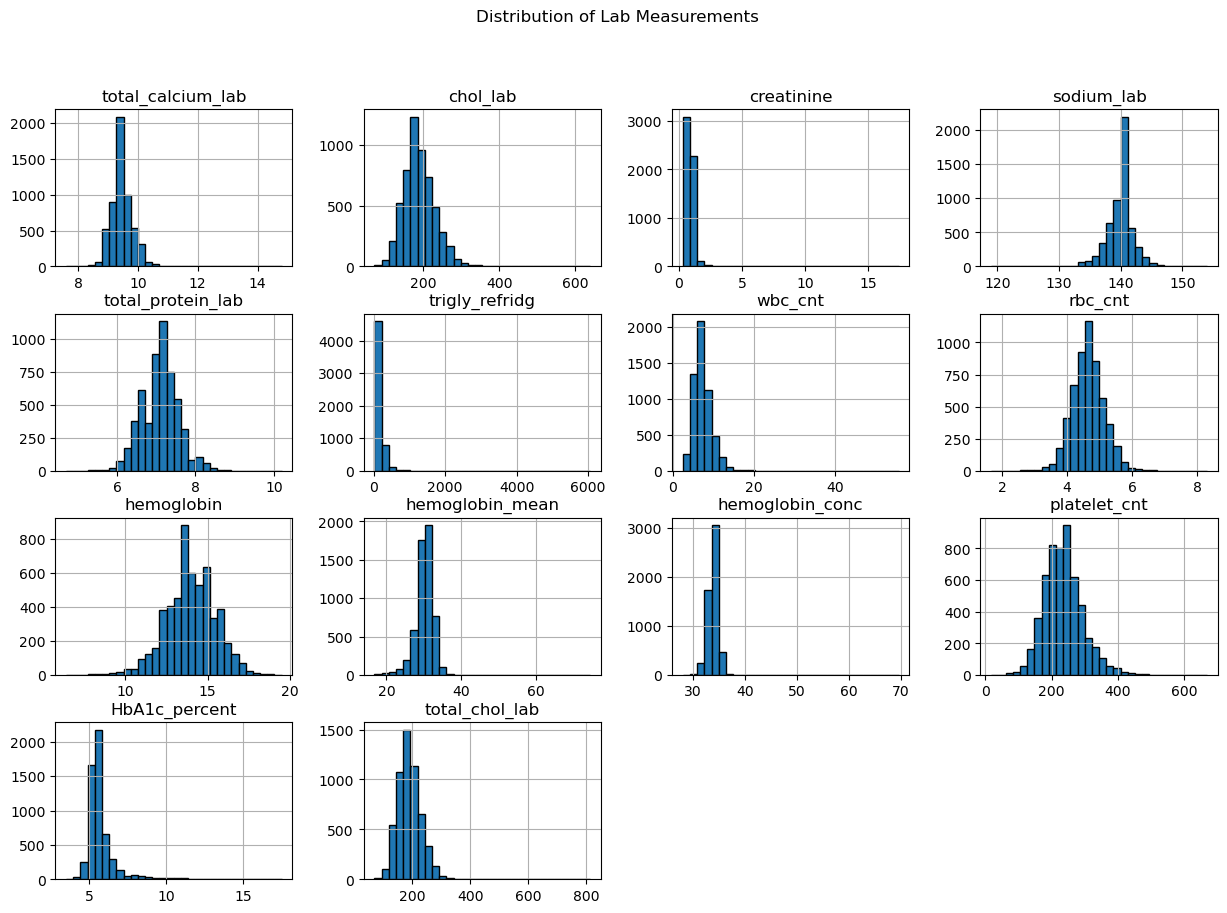

In [238]:
# Plot histograms for each lab measurement
lab_columns.hist(figsize=(15, 10), bins=30, edgecolor='black')
plt.suptitle('Distribution of Lab Measurements')
plt.show()

HbA1c_percent appears to be right skewed, a normal HbA1c level is below 5.7%, majority of respondents report to have an amount higher than so, indicating the presence of diabetes for the majority of respondents.  

### Diet EDA

In [240]:
diet_df = pd.read_csv('~/Downloads/capstone/CapstoneJulyNYC/Data/Clean_Data/diet_df_clean_filtered.csv')

In [242]:
diet_df.head()

,SEQN,energy_kcal,protein_gm,carb_gm,tot_sugar_gm,tot_fat_gm,tot_sat_fattyacids_gm,tot_monounsat_fattyacids_gm,tot_polyunsat_fattyacids_gm,chol_mg_diet,...,potassium_mg_diet,calcium_mg_diet,iron_mg_diet,vit_b12_mcg,vit_c_mg,vit_d_mcg,vit_k_mcg,alcohol_gm,caffeine_mg,on_special_diet
0,73557,1574.0,43.63,239.59,176.47,52.81,17.819,18.493,8.829,209.0,...,2228.0,949.0,8.41,2.79,241.4,3.3,29.2,0.0,203.0,2.0
1,73558,5062.0,338.13,423.78,44.99,124.29,53.408,35.481,20.505,2584.0,...,4930.0,3193.0,26.88,21.45,2.3,15.2,23.4,119.0,240.0,2.0
2,73559,1743.0,64.61,224.39,102.90,65.97,25.263,20.902,12.953,88.0,...,1694.0,877.0,17.57,3.78,195.1,4.0,40.4,0.0,45.0,1.0
3,73561,1421.0,55.24,178.20,87.78,55.36,4.479,26.216,1.263,41.0,...,1445.0,1410.0,17.72,8.30,236.5,23.5,126.0,0.0,24.0,1.0
4,73562,1785.0,55.11,189.59,81.75,93.92,22.155,40.013,23.550,534.0,...,3002.0,1156.0,9.52,1.68,224.4,6.0,103.9,0.0,144.0,2.0


### Correlations

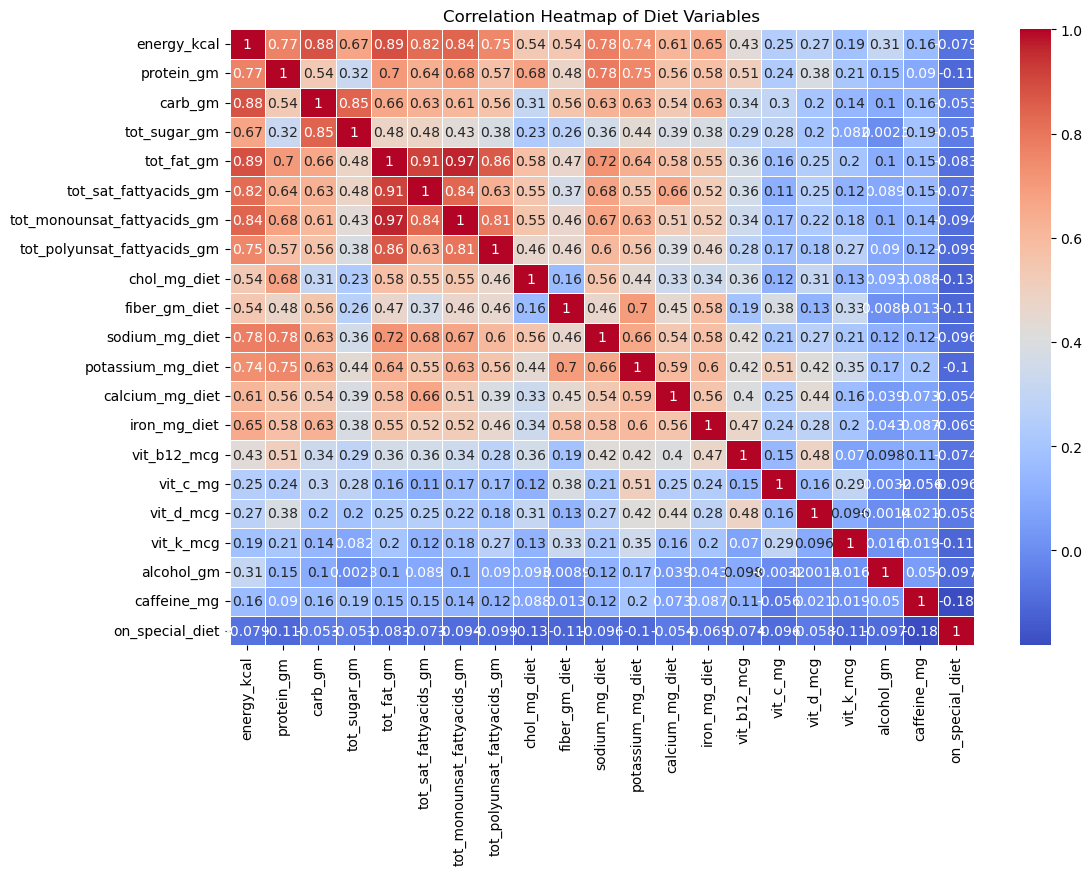

In [255]:
# Select numerical lab columns (excluding SEQN if necessary)
diet_columns = diet_df.drop(columns=['SEQN'])

# Calculate correlation matrix
corr_matrix = diet_columns.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Diet Variables')
plt.show()

Carbohydrate, protein, fat, sugar and protein intake per gram are highly positively correlated with energy_kcal intake. Respondents who reported being on a special diet have slightly lower instances of caffeine intake.  

### Examination EDA

In [246]:
exam_df = pd.read_csv('~/Downloads/capstone/CapstoneJulyNYC/Data/Clean_Data/exam_df_clean_filtered.csv')

In [248]:
exam_df.head()

,SEQN,puls_reg_nonreg,bpsy_r1,bpsy_r2,bpsy_r3,bpdi_r1,bpdi_r2,bpdi_r3,weight_kg,height_cm,bmi,waist_circum_cm,arm_circum_cm,leg_len_cm
0,73557,1.0,122.0,114.0,102.0,72.0,76.0,74.0,78.3,171.3,26.7,100.0,35.3,39.2
1,73558,1.0,156.0,160.0,156.0,62.0,80.0,42.0,89.5,176.8,28.6,107.6,34.7,40.0
2,73559,1.0,140.0,140.0,146.0,90.0,76.0,80.0,88.9,175.3,28.9,109.2,33.5,40.0
3,73561,1.0,136.0,134.0,142.0,86.0,88.0,86.0,52.0,162.4,19.7,87.8,25.2,36.3
4,73562,1.0,160.0,158.0,154.0,84.0,82.0,80.0,105.0,158.7,41.7,123.1,41.8,34.2


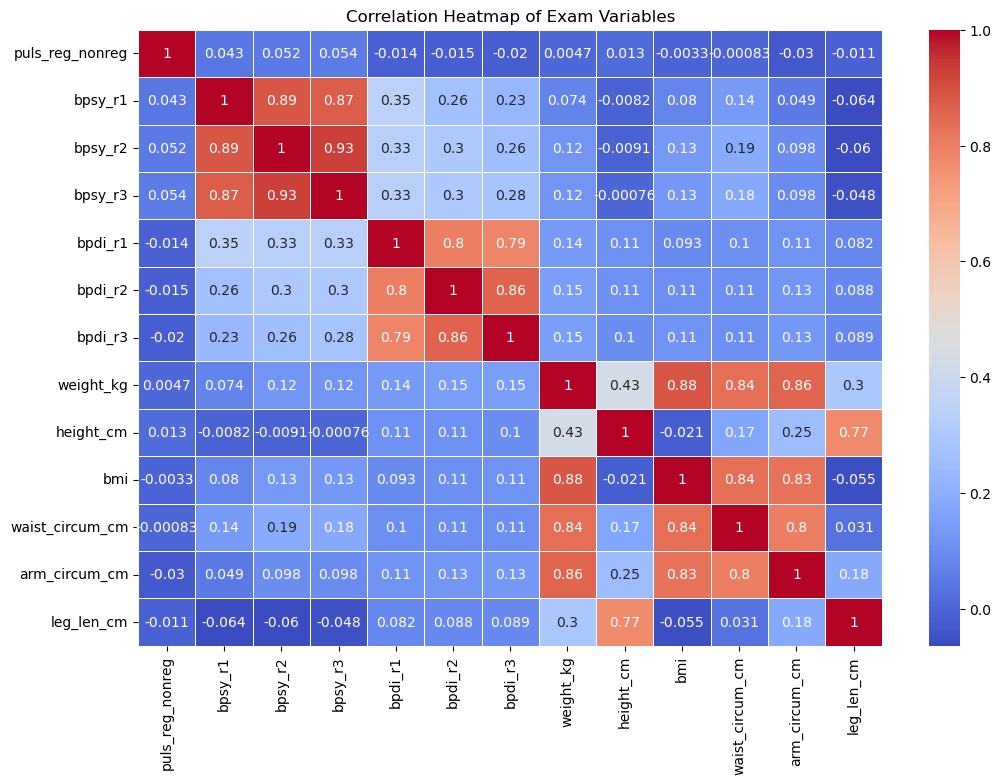

In [257]:
# Select numerical lab columns (excluding SEQN if necessary)
exam_columns = exam_df.drop(columns=['SEQN'])

# Calculate correlation matrix
corr_matrix = exam_columns.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Exam Variables')
plt.show()

Weight and BMI have a strong positive correlation, indicating as weight increases, so does BMI. Waist circumference and arm circumference also increases as weight increases. Leg length increases as height increases.

### Medications EDA

Although medications will not be used in the final analysis, it is still good to explore what are the most popular medications amongst survey respondents.

In [78]:
meds_df = pd.read_csv('~/Downloads/capstone/CapstoneJulyNYC/Data/Clean_Data/medic_df_clean_filtered.csv')

In [80]:
meds_df.head()

,SEQN,rx_use,drug_name,RXQSEEN,rx_days,rx_amt
0,73557,1,INSULIN,2.0,1460.0,2.0
1,73558,1,GABAPENTIN,1.0,243.0,4.0
2,73558,1,INSULIN GLARGINE,1.0,365.0,4.0
3,73558,1,OLMESARTAN,1.0,14.0,4.0
4,73558,1,SIMVASTATIN,1.0,61.0,4.0


In [84]:
# dropping RXQSEEN column -> if medication container was seen by the interviewer 

meds_df = meds_df.drop(columns='RXQSEEN')
meds_df

,SEQN,rx_use,drug_name,rx_days,rx_amt
0,73557,1,INSULIN,1460.0,2.0
1,73558,1,GABAPENTIN,243.0,4.0
2,73558,1,INSULIN GLARGINE,365.0,4.0
3,73558,1,OLMESARTAN,14.0,4.0
4,73558,1,SIMVASTATIN,61.0,4.0
...,...,...,...,...,...
19457,83727,2,CLONAZEPAM,1095.0,5.0
19458,83728,2,TAMSULOSIN,1095.0,5.0
19459,83729,2,LEVOTHYROXINE,1095.0,5.0
19460,83730,2,ALPRAZOLAM,1095.0,5.0


In [86]:
meds_df.shape

(19462, 5)

<AxesSubplot:title={'center':'Top 20 Medications'}>

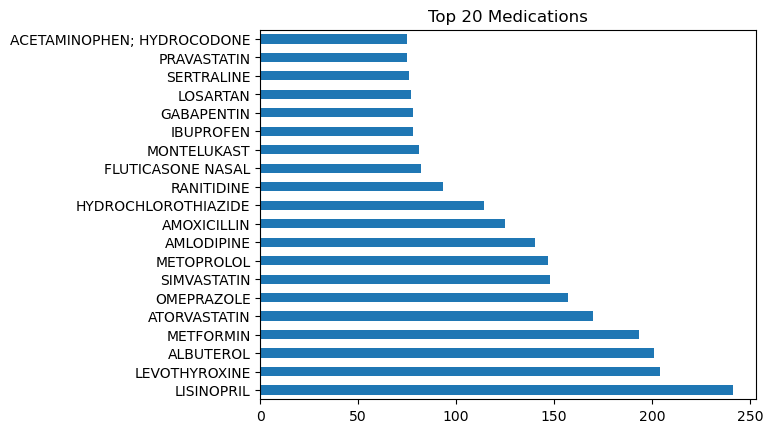

In [66]:
meds_df['drug_name'].value_counts().head(20).plot(kind='barh',title='Top 20 Medications')

Medications that can be correlated to CVD:

Rx that end in -Statin typically are used to control cholesterol levels